<a href="https://colab.research.google.com/github/yamrajkhadka/mnist_using_lnetarchitecture/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define class names for digits
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to add channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define LeNet architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=1, activation='tanh',
                 input_shape=(28, 28, 1)),  # Conv1
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),  # AvgPool1
    layers.Conv2D(16, kernel_size=(5, 5), strides=1, activation='tanh'),  # Conv2
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),  # AvgPool2
    layers.Flatten(),  # Flatten layer
    layers.Dense(120, activation='tanh'),  # FC1
    layers.Dense(84, activation='tanh'),  # FC2
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8543 - loss: 0.5050
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9690 - loss: 0.1027
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9801 - loss: 0.0636
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9854 - loss: 0.0493
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9881 - loss: 0.0365
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9896 - loss: 0.0311
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0242
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9924 - loss: 0.0246
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0200
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9955 - loss: 0.0146
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0629
Test Accuracy: 0.9854


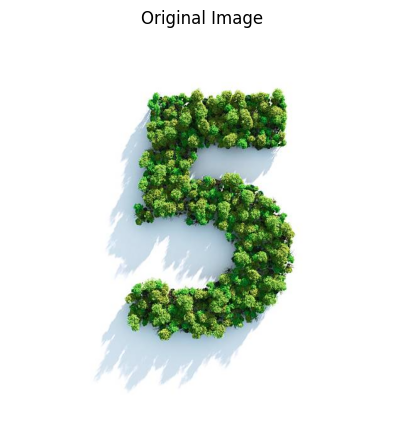

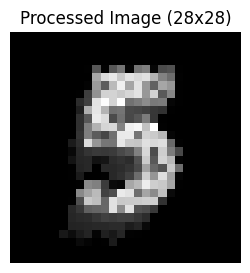

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
Predicted Digit: 5
Confidence: 0.63


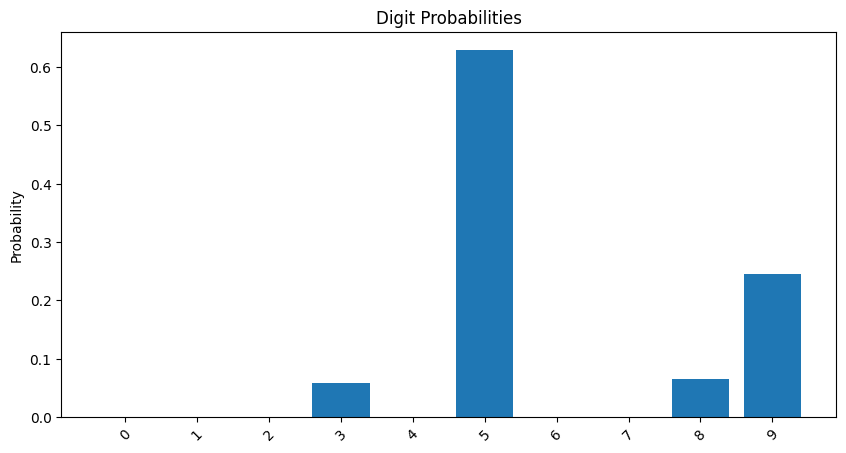

In [3]:


def preprocess_image(image):
    """
    Preprocess image for model prediction.
    """
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28 pixels
    image = cv2.resize(image, (28, 28))

    # Invert image (assuming black digits on white background)
    image = 255 - image

    # Normalize and reshape for LeNet (needs channel dimension)
    image = image.reshape(1, 28, 28, 1) / 255.0

    return image

def predict_from_path(image_path):
    """
    Make prediction from image path.
    """
    try:
        # Load image from path
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Could not read image from {image_path}")
            return

        # Show the original image
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show()

        # Preprocess image
        processed_img = preprocess_image(image)

        # Show the processed image
        plt.figure(figsize=(3, 3))
        plt.imshow(processed_img.reshape(28, 28), cmap='gray')
        plt.title("Processed Image (28x28)")
        plt.axis('off')
        plt.show()

        # Make prediction
        prediction = model.predict(processed_img)
        predicted_class = np.argmax(prediction[0])
        confidence = np.max(prediction[0])

        # Display results
        print(f"Predicted Digit: {class_names[predicted_class]}")
        print(f"Confidence: {confidence:.2f}")

        # Display prediction as bar chart
        plt.figure(figsize=(10, 5))
        plt.bar(class_names, prediction[0])
        plt.ylabel('Probability')
        plt.title('Digit Probabilities')
        plt.xticks(rotation=45)
        plt.show()

    except Exception as e:
        print(f"Error processing image: {e}")

# Example usage:
# Replace with your image path
image_path = "/content/gettyimages-182721214-612x612.jpg"
predict_from_path(image_path)